In [225]:
import warnings
warnings.filterwarnings("ignore")

In [226]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h1>Load Data</h1>

In [227]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [228]:
print(f'Train shape: {train_data.shape}')
print(f'Test shape: {test_data.shape}')

Train shape: (1460, 81)
Test shape: (1459, 80)


In [229]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


<h1>Data Preprocessing</h1>

In [230]:
train_data.drop(columns=['Id'], axis=1, inplace=True)

In [231]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [232]:
train_data.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [233]:
train_data.isna().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64

In [234]:
null_cols = []

for col in train_data.columns:
    if train_data[col].isna().sum() > 0:
        null_cols.append([col, train_data[col].isna().sum() * 100 / train_data.shape[0]])

null_cols.sort(reverse=True, key=lambda x: x[1])
null_cols

[['PoolQC', 99.52054794520548],
 ['MiscFeature', 96.3013698630137],
 ['Alley', 93.76712328767124],
 ['Fence', 80.75342465753425],
 ['MasVnrType', 59.726027397260275],
 ['FireplaceQu', 47.26027397260274],
 ['LotFrontage', 17.73972602739726],
 ['GarageType', 5.5479452054794525],
 ['GarageYrBlt', 5.5479452054794525],
 ['GarageFinish', 5.5479452054794525],
 ['GarageQual', 5.5479452054794525],
 ['GarageCond', 5.5479452054794525],
 ['BsmtExposure', 2.6027397260273974],
 ['BsmtFinType2', 2.6027397260273974],
 ['BsmtQual', 2.5342465753424657],
 ['BsmtCond', 2.5342465753424657],
 ['BsmtFinType1', 2.5342465753424657],
 ['MasVnrArea', 0.547945205479452],
 ['Electrical', 0.0684931506849315]]

In [235]:
def fill_by_mean(data=pd.DataFrame(), col=str):
    mean = data[col].mean()
    data[col] = data[col].fillna(mean)
    return data[col]

In [236]:
def fill_by_mode(data=pd.DataFrame(), col=str):
    mode = data[col].mode()[0]
    data[col] = data[col].fillna(mode)
    return data[col]

In [237]:
# lấy ra những cột có tỷ lệ null > 30%
del_cols = [col[0] for col in null_cols if col[1] > 30]
for col in del_cols:
    train_data.drop(columns=[col], axis=1, inplace=True)
    test_data.drop(columns=[col], axis=1, inplace=True)
    
train_data.shape, test_data.shape

((1460, 74), (1459, 74))

<h5>Fill for train</h5>

In [238]:
null_num_cols = []
null_cat_cols = []

for col in train_data.columns:
    pert = train_data[col].isna().sum() * 100 / train_data.shape[0]
    if pert > 0:
      if train_data[col].dtype == 'object':
        null_cat_cols.append([col, pert])
      else:
        null_num_cols.append([col, pert])
        
null_num_cols, null_cat_cols

([['LotFrontage', 17.73972602739726],
  ['MasVnrArea', 0.547945205479452],
  ['GarageYrBlt', 5.5479452054794525]],
 [['BsmtQual', 2.5342465753424657],
  ['BsmtCond', 2.5342465753424657],
  ['BsmtExposure', 2.6027397260273974],
  ['BsmtFinType1', 2.5342465753424657],
  ['BsmtFinType2', 2.6027397260273974],
  ['Electrical', 0.0684931506849315],
  ['GarageType', 5.5479452054794525],
  ['GarageFinish', 5.5479452054794525],
  ['GarageQual', 5.5479452054794525],
  ['GarageCond', 5.5479452054794525]])

In [239]:
for col, pert in null_num_cols:
    train_data[col] = fill_by_mean(train_data, col)

In [240]:
for col, pert in null_cat_cols:
    train_data[col] = fill_by_mode(train_data, col)

<h5>Fill for test</h5>

In [241]:
null_num_cols = []
null_cat_cols = []

for col in test_data.columns:
    pert = test_data[col].isna().sum() * 100 / test_data.shape[0]
    if pert > 0:
      if test_data[col].dtype == 'object':
        null_cat_cols.append([col, pert])
      else:
        null_num_cols.append([col, pert])

null_num_cols, null_cat_cols

([['LotFrontage', 15.558601782042494],
  ['MasVnrArea', 1.0281014393420151],
  ['BsmtFinSF1', 0.06854009595613433],
  ['BsmtFinSF2', 0.06854009595613433],
  ['BsmtUnfSF', 0.06854009595613433],
  ['TotalBsmtSF', 0.06854009595613433],
  ['BsmtFullBath', 0.13708019191226867],
  ['BsmtHalfBath', 0.13708019191226867],
  ['GarageYrBlt', 5.346127484578479],
  ['GarageCars', 0.06854009595613433],
  ['GarageArea', 0.06854009595613433]],
 [['MSZoning', 0.27416038382453733],
  ['Utilities', 0.13708019191226867],
  ['Exterior1st', 0.06854009595613433],
  ['Exterior2nd', 0.06854009595613433],
  ['BsmtQual', 3.015764222069911],
  ['BsmtCond', 3.0843043180260454],
  ['BsmtExposure', 3.015764222069911],
  ['BsmtFinType1', 2.8786840301576424],
  ['BsmtFinType2', 2.8786840301576424],
  ['KitchenQual', 0.06854009595613433],
  ['Functional', 0.13708019191226867],
  ['GarageType', 5.2090472926662095],
  ['GarageFinish', 5.346127484578479],
  ['GarageQual', 5.346127484578479],
  ['GarageCond', 5.34612748457

In [242]:
for col, pert in null_num_cols:
    test_data[col] = fill_by_mean(test_data, col)

for col, pert in null_cat_cols:
    test_data[col] = fill_by_mode(test_data, col)

<h5>Check null for train and test data</h5>

In [243]:
train_data.isna().sum().sum(), test_data.isna().sum().sum()

(0, 0)

In [244]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [245]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1459 non-null   object 
 3   LotFrontage    1459 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1459 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearBuil

<h5>Heat map to show the correlation between the features with dtype numerical</h5>

In [246]:
numeric_features = train_data.select_dtypes(include=[np.number])

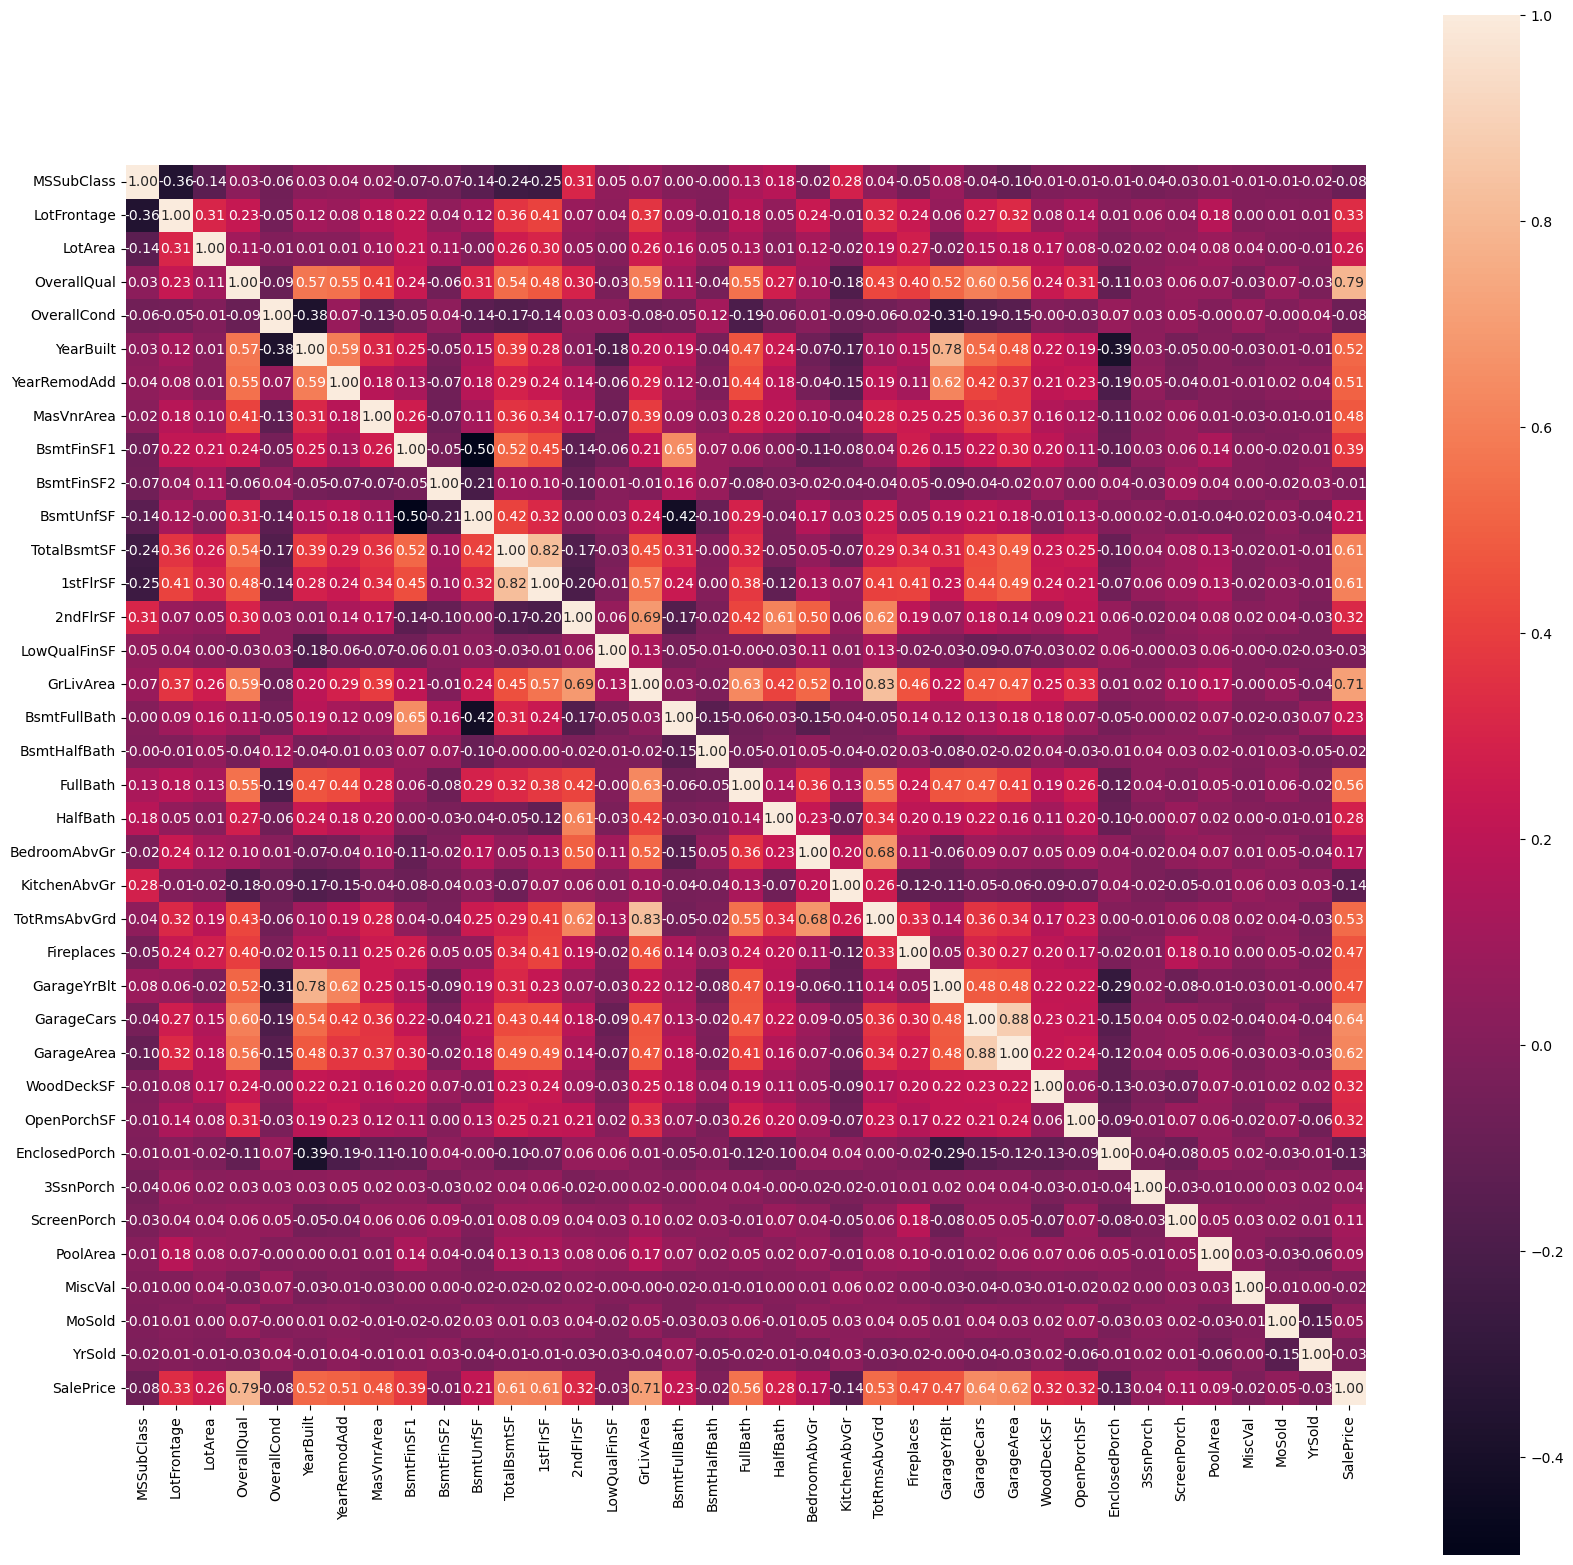

In [247]:
corr = numeric_features.corr()
hm_features = np.corrcoef(numeric_features.values.T)
plt.figure(figsize=(20, 20))
sns.heatmap(hm_features, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=numeric_features.columns, xticklabels=numeric_features.columns)
plt.show()

In [248]:
final_df = pd.concat([train_data, test_data], axis=0)

In [249]:
final_df.shape

(2919, 75)

In [250]:
# Tạo hàm để chuyển các kiểu categorical thành dạng số
def get_dummy_cate(cols):
    global final_df
    for col in cols:
        final_df = pd.concat([final_df, pd.get_dummies(final_df[col], drop_first=True)], axis=1)
        final_df.drop(col, axis=1, inplace=True)

In [251]:
get_dummy_cate(final_df.select_dtypes(include=[np.object_]).columns)

In [252]:
final_df.shape

(2919, 231)

In [253]:
# Lọc cột duplicate
final_df = final_df.loc[:,~final_df.columns.duplicated()]

In [254]:
final_df.shape

(2919, 177)

In [255]:
final_df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,ConLI,ConLw,New,Oth,WD,AdjLand,Alloca,Family,Normal,Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,False,False,False,False,True,False,False,False,True,False
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,False,False,False,False,True,False,False,False,True,False
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,False,False,False,False,True,False,False,False,True,False
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,False,False,False,False,True,False,False,False,False,False
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,False,False,False,False,True,False,False,False,True,False


In [256]:
train_data = final_df.iloc[:1460, :]
test_data = final_df.iloc[1460:, :]

In [257]:
train_data.shape, test_data.shape

((1460, 177), (1459, 177))

In [258]:
test_data.drop(columns=['SalePrice'], axis=1, inplace=True)

In [259]:
train_data.drop(columns=['Id'], axis=1, inplace=True)

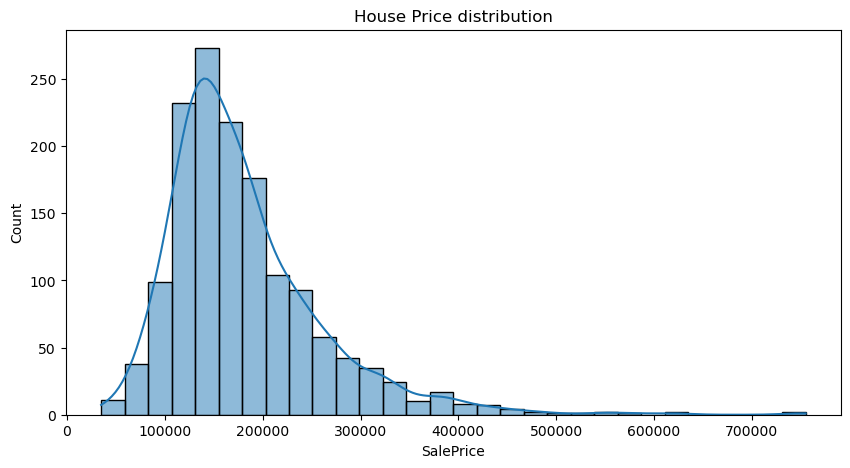

In [260]:
# House Price distribution
plt.figure(figsize=(10, 5))
sns.histplot(train_data['SalePrice'], kde=True, bins=30)
plt.title('House Price distribution')
plt.show()

<h2>Data Exploration</h2>

<Figure size 1000x500 with 0 Axes>

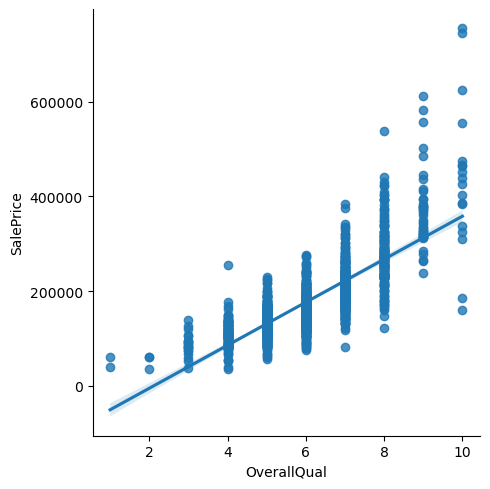

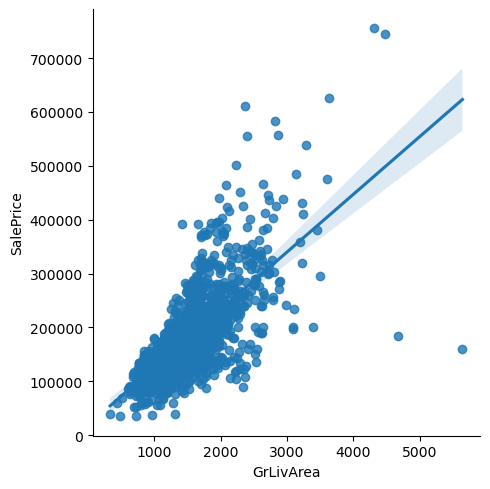

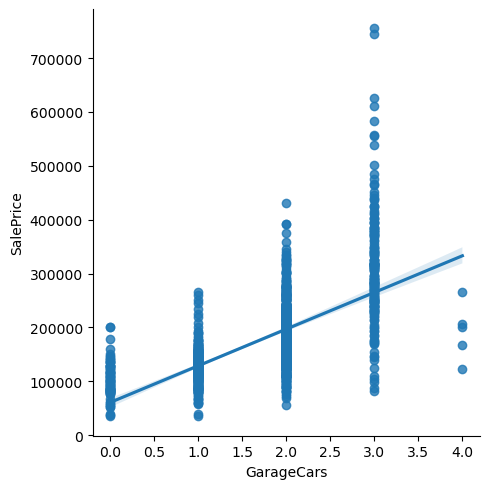

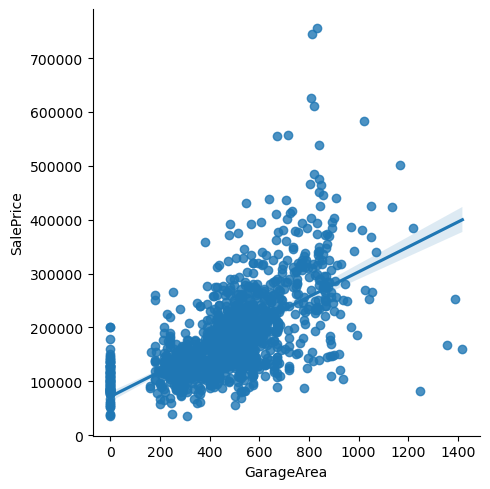

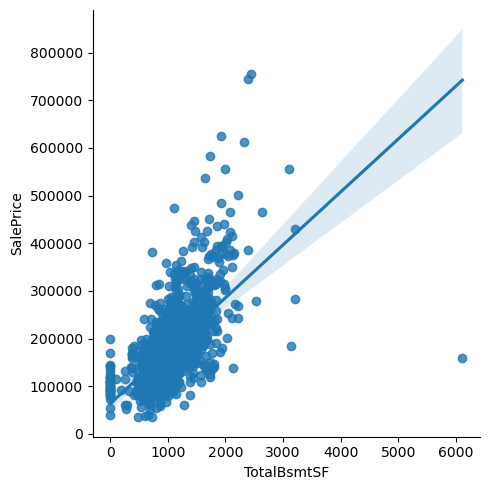

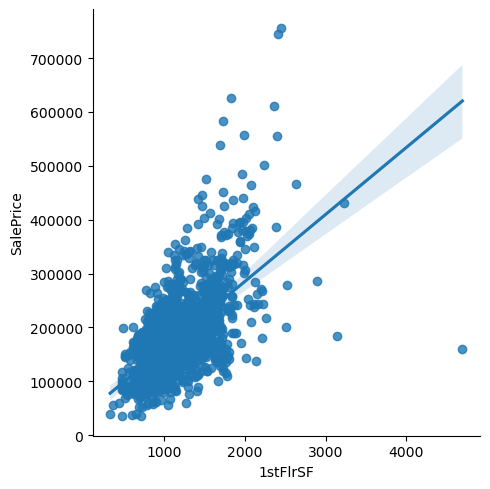

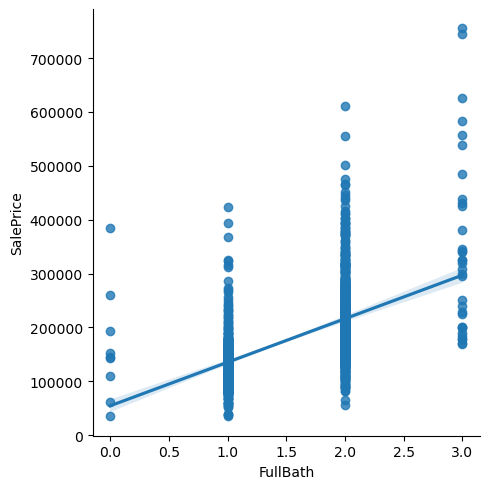

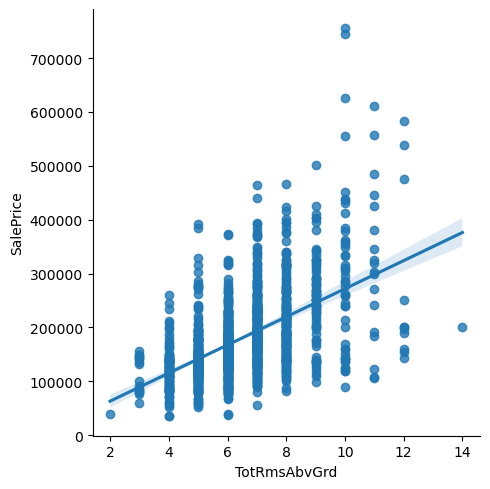

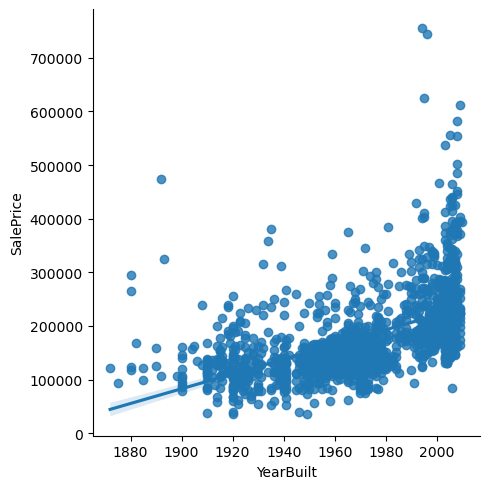

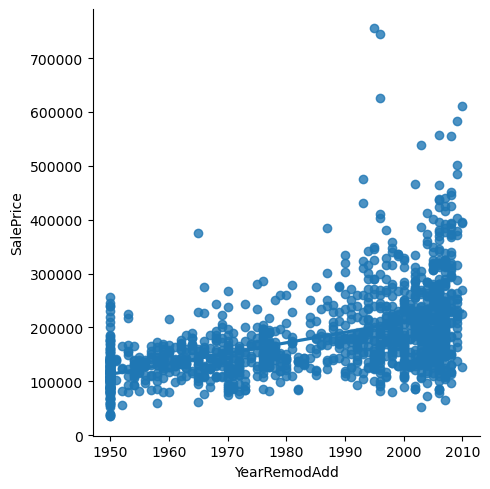

In [261]:
corr = train_data.corr()
high_corr_coef = corr['SalePrice'].sort_values(ascending=False)
plt.figure(figsize=(10, 5))
for i in range(1, 11):
  sns.lmplot(x=high_corr_coef.index[i], y='SalePrice', data=train_data)
  plt.show()

<h1>Import and Train model with data</h1>
<h3>Linear regression</h3>

In [262]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [263]:
mae_dict = {}
rmse_dict = {}

In [264]:
X = train_data.drop(columns=['SalePrice'], axis=1)
y = train_data['SalePrice']

In [265]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(">>> Data Splitting <<<")
print('X train shape', X_train.shape)
print('y train shape', y_train.shape)
print('X test shape', X_test.shape)
print('y test shape', y_test.shape, end='\n\n')

lr1 = LinearRegression()
lr1.fit(X_train, y_train)

y_train_pred = lr1.predict(X_train)
print(">>> Actual vs Prediction on train<<<")
print(pd.DataFrame({'Actual': y_train.values.flatten(), 'Predict': y_train_pred.flatten()}).head(), end='\n\n')

y_test_pred = lr1.predict(X_test)
print(">>> Actual vs Prediction on test<<<")
print(pd.DataFrame({'Actual': y_test.values.flatten(), 'Predict': y_test_pred.flatten()}).head(), end='\n\n')

MAE_train = mean_absolute_error(y_train, y_train_pred)
MAE_test = mean_absolute_error(y_test, y_test_pred)
print(">>> Model Evaluation <<<")
print('MAE_train:', MAE_train)
print('MAE_test:', MAE_test)
print("=" * 30)
print('RMSE_train:', mean_squared_error(y_train, y_train_pred)**0.5)
print('RMSE_test:', mean_squared_error(y_test, y_test_pred)**0.5)
print("=" * 30)
print('R2_train:', r2_score(y_train, y_train_pred))
print('R2_test:', r2_score(y_test, y_test_pred))

mae_dict['Linear Regression'] = [mean_absolute_error(y_train, y_train_pred), mean_absolute_error(y_test, y_test_pred)]
rmse_dict['Linear Regression'] = [mean_squared_error(y_train, y_train_pred)**0.5, mean_squared_error(y_test, y_test_pred)**0.5]

>>> Data Splitting <<<
X train shape (1168, 175)
y train shape (1168,)
X test shape (292, 175)
y test shape (292,)

>>> Actual vs Prediction on train<<<
     Actual        Predict
0  145000.0  146175.595662
1  178000.0  172577.600506
2   85000.0   75818.887650
3  175000.0  161476.183152
4  127000.0  155982.207569

>>> Actual vs Prediction on test<<<
     Actual        Predict
0  154500.0  151101.928701
1  325000.0  338767.572935
2  115000.0   99406.262637
3  159000.0  159715.220605
4  315500.0  288586.010979

>>> Model Evaluation <<<
MAE_train: 14538.772744651977
MAE_test: 20499.39565911099
RMSE_train: 23227.68767061807
RMSE_test: 48271.43501124571
R2_train: 0.9095446529626694
R2_test: 0.696214818626413


<h5>Predict on test data</h5>

In [266]:
house_price_predict = lr1.predict(test_data.drop(columns=['Id'], axis=1))

In [267]:
result = pd.DataFrame({'Id': test_data['Id'], 'SalePrice': house_price_predict})

In [268]:
result.to_csv('submission1.csv', index=False)

<h3>Random forest</h3>

In [269]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
results = {'estimator': [], 'train_rmse': [], 'test_rmse': []}

for est in range(30, 100, 1):
  rf = RandomForestRegressor(n_estimators=est, random_state=42)
  rf.fit(X_train_scaled, y_train)
  y_test_pred = rf.predict(X_test_scaled)
  y_train_pred = rf.predict(X_train_scaled)
  results['estimator'].append(est)
  results['train_rmse'].append(mean_squared_error(y_train, y_train_pred)**0.5)
  results['test_rmse'].append(mean_squared_error(y_test, y_test_pred)**0.5)
result_df = pd.DataFrame(results)
result_df.sort_values(by='test_rmse', ascending=True, inplace=True)

In [ ]:
result_df

,estimator,train_rmse,test_rmse
65,95,11190.231536,28859.772101
61,91,11137.980452,28866.106542
59,89,11151.283068,28867.550001
60,90,11151.459447,28870.161111
64,94,11156.465985,28900.855427
...,...,...,...
2,32,11780.893239,30069.063362
5,35,11673.944471,30089.865502
0,30,11684.685271,30096.073309
3,33,11691.135222,30116.539023


In [271]:
rf = RandomForestRegressor(n_estimators=91, random_state=42)
rf.fit(X_train, y_train)
y_test_pred_3 = rf.predict(X_test)
y_train_pred_3 = rf.predict(X_train)

print(">>> Actual vs Prediction on train<<<")
print(pd.DataFrame({'Actual': y_train.values.flatten(), 'Predict': y_train_pred_3.flatten()}).head(), end='\n\n')

y_test_pred = lr1.predict(X_test)
print(">>> Actual vs Prediction on test<<<")
print(pd.DataFrame({'Actual': y_test.values.flatten(), 'Predict': y_test_pred_3.flatten()}).head(), end='\n\n')

MAE_train = mean_absolute_error(y_train, y_train_pred_3)
MAE_test = mean_absolute_error(y_test, y_test_pred_3)
print(">>> Model Evaluation <<<")
print('MAE_train:', MAE_train)
print('MAE_test:', MAE_test)
print("=" * 30)
print('RMSE_train:', mean_squared_error(y_train, y_train_pred_3)**0.5)
print('RMSE_test:', mean_squared_error(y_test, y_test_pred_3)**0.5)
print("=" * 30)
print('R2_train:', r2_score(y_train, y_train_pred_3))
print('R2_test:', r2_score(y_test, y_test_pred_3))

mae_dict['Random Forest'] = [mean_absolute_error(y_train, y_train_pred_3), mean_absolute_error(y_test, y_test_pred_3)]
rmse_dict['Random Forest'] = [mean_squared_error(y_train, y_train_pred_3)**0.5, mean_squared_error(y_test, y_test_pred_3)**0.5]

>>> Actual vs Prediction on train<<<
     Actual        Predict
0  145000.0  144128.296703
1  178000.0  177502.197802
2   85000.0   91733.879121
3  175000.0  165440.109890
4  127000.0  132033.923077

>>> Actual vs Prediction on test<<<
     Actual        Predict
0  154500.0  141411.263736
1  325000.0  316772.494505
2  115000.0  117828.296703
3  159000.0  160843.956044
4  315500.0  323417.307692

>>> Model Evaluation <<<
MAE_train: 6706.53693737769
MAE_test: 17950.49565959155
RMSE_train: 11132.533156969821
RMSE_test: 28930.397264969124
R2_train: 0.9792216870342202
R2_test: 0.8908823610233564


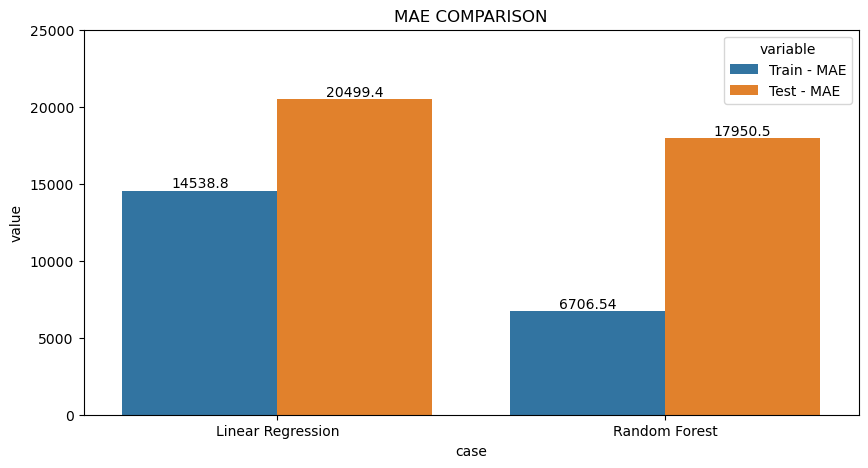

In [272]:
dfplot = pd.DataFrame(mae_dict).T.reset_index()
dfplot.columns = ['case', 'Train - MAE', 'Test - MAE']
dfplot = pd.melt(dfplot, id_vars= 'case', value_vars= ['Train - MAE', 'Test - MAE'])

# Plot:
plt.figure(figsize=(10, 5))
ax = sns.barplot(data = dfplot, x = 'case', y = 'value', hue = 'variable')
plt.title('MAE COMPARISON')
for i in range(dfplot.variable.nunique()):
    plt.bar_label(ax.containers[i])
plt.ylim(0, 25000)
plt.show()

In [273]:
house_price_predict = rf.predict(test_data.drop(columns=['Id'], axis=1))
result = pd.DataFrame({'Id': test_data['Id'], 'SalePrice': house_price_predict})
result.to_csv('submission2.csv', index=False)